# Neural Networks with TensorFlow

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import optimize
from sklearn import datasets
import tensorflow as tf

## McCulloch and Pitts Neuron

In 1943, McCulloch and Pitts introduced a mathematical model of a neuron. It consisted of three components:

1. A set of **weights** $w_i$ corresponding to synapses (inputs)
2. An **adder** for summing input signals; analogous to cell membrane that collects charge
3. An **activation function** for determining when the neuron fires, based on accumulated input

The neuron model is shown schematically below. On the left are input nodes $\{x_i\}$, usually expressed as a vector. The strength with which the inputs are able to deliver the signal along the synapse is determined by their corresponding weights $\{w_i\}$. The adder then sums the inputs from all the synapses:

$$h = \sum_i w_i x_i$$

The parameter $\theta$ determines whether or not the neuron fires given a weighted input of $h$. If it fires, it returns a value $y=1$, otherwise $y=0$. 

For example, a simple **activation function** is using $\theta$ as a simple fixed threshold:

$$y = g(h) = \left\{ \begin{array}{l}
1, \text{if } h \gt \theta \\
0, \text{if } h \le \theta
\end{array} \right.$$

this activation function may take any of several forms, such as a logistic function.

![neuron](http://d.pr/i/9AMK+)

A single neuron is not interesting, nor useful, from a learning perspective. It cannot learn; it simply receives inputs and either fires or not. Only when neurons are joined as a **network** can they perform useful work.

Learning takes place by **changing the weights** of the connections in a neural network, and by changing the parameters of the activation functions of neurons.

## Perceptron

A collection of McCullough and Pitts neurons, along with a set of input nodes connected to the inputs via weighted edges, is a **perceptron**, the simplest neural network.

Each neuron is independent of the others in the perceptron, in the sense that its behavior and performance depends only on its own weights and threshold values, and not of those for the other neurons. Though they share inputs, they operate independently.

The number of inputs and outputs are **determined by the data**. Weights are stored as a `N x K` matrix, with N observations and K neurons, with $w_{ij}$ specifying the weight on the *i*th observation on the *j*th neuron.

![perceptron](http://d.pr/i/4IWA+)

In order to use the perceptron for statistical learning, we compare the outputs $y_j$ from each neuron to the obervation target $t_j$, and adjust the input weights when they do not correspond (*e.g.* if a neuron fires when it should not have).

$$t_j - y_j$$

We use this difference to update the weight $w_{ij}$, based on the input and a desired **learning rate**. This results in an update rule:

$$w_{ij} \leftarrow w_{ij} + \eta (t_j - y_j) x_i$$

After an incremental improvement, the perceptron is shown the training data again, resulting in another update. This is repeated until the performance no longer improves. Having a learning rate less than one results in a more stable learning rate, though this stability is traded off against having to expose the network to the data multiple times. Typical learning rates are in the 0.1-0.4 range.

An additional input node is typically added to the perceptron model, which is a constant value (usually -1, 0, or 1) that acts analogously to an intercept in a regression model. This establishes a baseline input for the case when all inputs are zero.

![bias](http://d.pr/i/105b5+)

## Learning with Perceptrons

1. Initialize weights $w_{ij}$ to small, random numbers.
2. For each t in T iterations
    * compute activation for each neuron *j* connected to each input vector *i*
    $$y_j = g\left( h=\sum_i w_{ij} x_i \right) = \left\{ \begin{array}{l}
1, \text{if } h \gt 0 \\
0, \text{if } h \le 0
\end{array} \right.$$
    * update weights
    $$w_{ij} \leftarrow w_{ij} + \eta (t_j - y_j) x_i$$


This algorithm is $\mathcal{O}(Tmn)$

A single perceptron can be used to learn extremely simple functions.

## Multi-layer Perceptron

The solution to fitting more complex (*i.e.* non-linear) models with neural networks is to use a more complex network that consists of more than just a single perceptron. The take-home message from the perceptron is that all of the learning happens by adapting the synapse weights until prediction is satisfactory. Hence, a reasonable guess at how to make a perceptron more complex is to simply **add more weights**.

There are two ways to add complexity:

1. Add backward connections, so that output neurons feed back to input nodes, resulting in a **recurrent network**
2. Add neurons between the input nodes and the outputs, creating an additional ("hidden") layer to the network, resulting in a **multi-layer perceptron**

The latter approach is more common in applications of neural networks.

![multilayer](http://d.pr/i/14BS1+)

### Learning with perceptrons

How to train a multilayer network is not intuitive. Propagating the inputs forward over two layers is straightforward, since the outputs from the hidden layer can be used as inputs for the output layer. However, the process for updating the weights based on the prediction error is less clear, since it is difficult to know whether to change the weights on the input layer or on the hidden layer in order to improve the prediction.

Updating a multi-layer perceptron (MLP) is a matter of: 

1. moving forward through the network, calculating outputs given inputs and current weight estimates
2. moving backward updating weights according to the resulting error from forward propagation. 

In this sense, it is similar to a single-layer perceptron, except it has to be done twice, once for each layer (in principle, we can add additional hidden layers, but without sacrificing generality, I will keep it simple).

### Error back-propagation

We update the weights in a MLP using **back-propagation** of the prediction errors, which is essentially a form of **gradient descent**, as used in optimization.

First, for the multi-layer perceptron we need to modify the error function, which in the single-layer case was a simple difference between the predicted and observed outputs. Because we will be summing errors, we have to avoid having errors in different directions cancelling each other out, so a sum of squares error is more appropriate:

$$E(t,y) = \frac{1}{2} \sum_i (t_i - y_i)^2$$

It is on this function that we will perform gradient descent, since the goal is to minimize the error. Specificially, we will differentiate with respect to the weights, since it is the weights that we are manipulating in order to get better predictions.

Recall that the error is a function of the **threshold function**

$$E(\mathbf{w}) = \frac{1}{2} \sum_i (t_i - y_i)^2 = \frac{1}{2} \sum_i \left(t_i - g\left[ \sum_j w_{ij} a_j \right]\right)^2$$

So, we will also need to differentiate that. However, the threshold function we used in the single-layer perceptron was discontinuous, making it non-differentiable. Thus, we need to modify it as well. An alternative is to employ some type of sigmoid function, such as the **logistic**, which can be parameterized to resemble a threshold function, but varies smoothly across its range.

$$g(h) = \frac{1}{1 + \exp(-\beta h)}$$

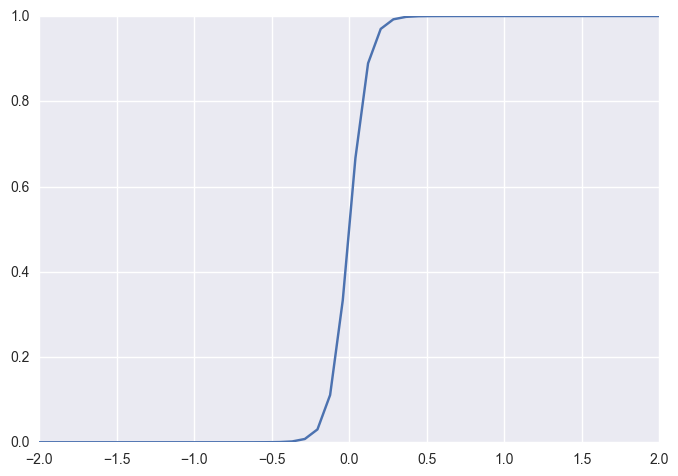

In [2]:
from IPython.html.widgets import interact

logistic = lambda h, beta: 1./(1 + np.exp(-beta * h))

@interact(beta=(-1, 25))
def logistic_plot(beta=5):
    hvals = np.linspace(-2, 2)
    plt.plot(hvals, logistic(hvals, beta))

This has the advantage of having a simple derivative:

$$\frac{dg}{dh} = \beta g(h)(1 - g(h))$$

Alternatively, the **hyperbolic tangent** function is also sigmoid:

$$g(h) = \tanh(h) = \frac{\exp(h) - \exp(-h)}{\exp(h) + \exp(-h)}$$

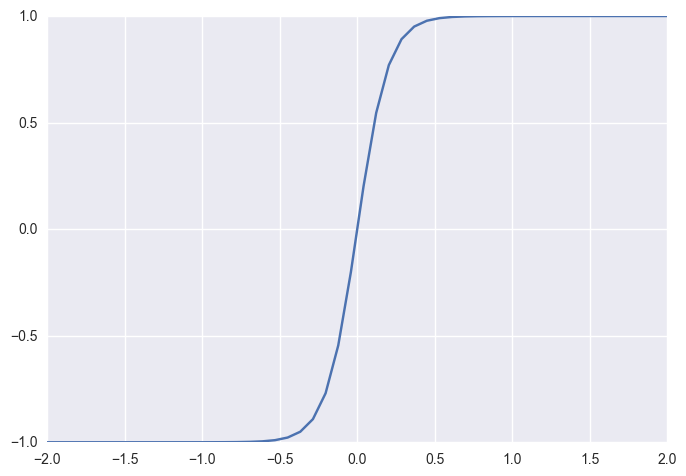

In [3]:
hyperbolic_tangent = lambda h: (np.exp(h) - np.exp(-h)) / (np.exp(h) + np.exp(-h))

@interact(theta=(-1, 25))
def tanh_plot(theta=5):
    hvals = np.linspace(-2, 2)
    h = hvals*theta
    plt.plot(hvals, hyperbolic_tangent(h))

Notice that the hyperbolic tangent function asymptotes at -1 and 1, rather than 0 and 1, which is sometimes beneficial, and its derivative is simple:

$$\frac{d \tanh(x)}{dx} = 1 - \tanh^2(x)$$

Performing gradient descent will allow us to change the weights in the direction that optimially reduces the error. The next trick will be to employ the **chain rule** to decompose how the error changes as a function of the input weights into the change in error as a function of changes in the inputs to the weights, mutliplied by the changes in input values as a function of changes in the weights. 

$$\frac{\partial E}{\partial w} = \frac{\partial E}{\partial h}\frac{\partial h}{\partial w}$$

This will allow us to write a function describing the activations of the output weights as a function of the activations of the hidden layer nodes and the output weights, which will allow us to propagate error backwards through the network.

The **second term** in the chain rule simplifies to:

$$\begin{align}
\frac{\partial h_k}{\partial w_{jk}} &= \frac{\partial \sum_l w_{lk} a_l}{\partial w_{jk}}  \\
&= \sum_l \frac{\partial w_{lk} a_l}{\partial w_{jk}} \\
& = a_j
\end{align}$$

where $a_j$ is the activation of the jth hidden layer neuron.

For the **first term** in the chain rule above, we decompose it as well:

$$\frac{\partial E}{\partial h_k} = \frac{\partial E}{\partial y_k}\frac{\partial y_k}{\partial h_k} = \frac{\partial E}{\partial g(h_k)}\frac{\partial g(h_k)}{\partial h_k}$$

The second term of this chain rule is just the derivative of the activation function, which we have chosen to have a conveneint form, while the first term simplifies to:

$$\frac{\partial E}{\partial g(h_k)} = \frac{\partial}{\partial g(h_k)}\left[\frac{1}{2} \sum_k (t_k - y_k)^2 \right] = t_k - y_k$$

Combining these, and assuming (for illustration) a logistic activiation function, we have the gradient:

$$\frac{\partial E}{\partial w} = (t_k - y_k) y_k (1-y_k) a_j$$

Which ends up getting plugged into the weight update formula that we saw in the single-layer perceptron:

$$w_{jk} \leftarrow w_{jk} - \eta (t_k - y_k) y_k (1-y_k) a_j$$

Note that here we are *subtracting* the second term, rather than adding, since we are doing gradient descent.

We can now outline the *MLP learning algorithm*:

1. **Initialize** all $w_{jk}$ to small random values
2. For each input vector, conduct **forward propagation**:
    * compute activation of each neuron $j$ in hidden layer (here, sigmoid):
    $$h_j = \sum_i x_i v_{ij}$$
    $$a_j = g(h_j) = \frac{1}{1 + \exp(-\beta h_j)}$$
    * when the output layer is reached, calculate outputs similarly:
    $$h_k = \sum_k a_j w_{jk}$$
    $$y_k = g(h_k) = \frac{1}{1 + \exp(-\beta h_k)}$$
3. **Calculate loss** for resulting predictions:
    * compute error at output:
    $$\delta_k = (t_k - y_k) y_k (1-y_k)$$
4. Conduct **backpropagation** to get partial derivatives of cost with respect to weights, and use these to update weights:
    * compute error of the hidden layers:
    $$\delta_{hj} = \left[\sum_k w_{jk} \delta_k \right] a_j(1-a_j)$$
    * update output layer weights:
    $$w_{jk} \leftarrow w_{jk} - \eta \delta_k a_j$$
    * update hidden layer weights:
    $$v_{ij} \leftarrow v_{ij} - \eta \delta_{hj} x_i$$
    
Return to (2) and iterate until learning completes. Best practice is to shuffle input vectors to avoid training in the same order.

Its important to be aware that because gradient descent is a hill-climbing (or descending) algorithm, it is liable to be caught in **local minima** with respect to starting values. Therefore, it is worthwhile training several networks using a range of starting values for the weights, so that you have a better chance of discovering a globally-competitive solution.

One useful performance enhancement for the MLP learning algorithm is the addition of **momentum** to the weight updates. This is just a coefficient on the previous weight update that increases the correlation between the current weight and the weight after the next update. This is particularly useful for complex models, where falling into local mimima is an issue; adding momentum will give some weight to the previous direction, making the resulting weights essentially a weighted average of the two directions. Adding momentum, along with a **smaller learning rate**, usually results in a more stable algorithm with quicker convergence. When we use momentum, we lose this guarantee, but this is generally seen as a small price to pay for the improvement momentum usually gives.

A weight update with momentum looks like this:

$$w_{jk} \leftarrow w_{jk} - \eta \delta_k a_j + \alpha \Delta w_{jk}^{t-1}$$

where $\alpha$ is the momentum (regularization) parameter and $\Delta w_{jk}^{t-1}$ the update from the previous iteration.

## TensorFlow

![](https://www.tensorflow.org/images/logo-alt@2x.png)

TensorFlow is a computing toolkit created by Google for numerical computation using **data flow graphs**. Google open-sourced the TensorFlow API and a reference implementation under the Apache 2.0 license in November, 2015.

A data flow graph is a directed graph, composed of a set of nodes. Nodes represent mathematical operations, while the graph edges represent tensors (multidimensional data arrays) that communicate between them.  No data flows along the edges, but they indicate that the source node for the control dependence must finish executing before the destination node for the control dependence starts executing.

Thus, TensorFlow has a very different execution model than most packages in Python or R. It results in **lazy evaluation** of the operations associated with each node. This confers several advantages:

- Faster computation of complex variables
- Distributed computation across multiple systems, including GPUs.
- Reduced redundency in some computations

When used to construct deep neural networks, TensorFlow allows you to stack a number of different models and transformations in one model and learn them all together. You can handle text, images and regular categorical and continues variables inside one model with ease. 


### A Simple example

Consider the following trivial Python calculation:

In [2]:
x = 12
y = np.sqrt(x + 0.5)
print(y)

3.53553390593


Here are the same operations, implemented in TensorFlow:

In [3]:
x = tf.constant(12., name='x')
y = tf.Variable(tf.sqrt(x + 0.5), name='y')

print(y)

TensorFlow has not evaluated the expression. Instead, it has created a **graph** consisting of the following:

- Create a `constant` value called x, and give it the numerical value 12
- Create a `Variable` called y, and define it as being the equation $\sqrt{x + 0.5}$
- Print out the **equation object** for y

TensorFlow separates the definition of operations from their execution. While a graph defines the operations, the operations only happen within a `Session`.

In [4]:
model = tf.initialize_all_variables()

with tf.Session() as session:
    session.run(model)
    print(session.run(y))

3.53553


In [5]:
graph = tf.get_default_graph()

In [6]:
operations = graph.get_operations()
operations

In [7]:
[x.name for x in operations]

['x', 'add/y', 'add', 'Sqrt', 'y', 'y/Assign', 'y/read', 'init']

Here is the protocol buffer for the first node:

In [8]:
operations[0].node_def

name: "x"
op: "Const"
attr {
  key: "dtype"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "value"
  value {
    tensor {
      dtype: DT_FLOAT
      tensor_shape {
      }
      float_val: 12.0
    }
  }
}

### Basic operations with variable as graph input

The value returned by the constructor represents the output of the `Variable` op (define as input when running session). 

Here is the graph input:

In [9]:
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

We can define some operations:

In [10]:
add = tf.add(a, b)
mul = tf.mul(a, b)

Now launch the default graph in a session, and run operations:

In [11]:
with tf.Session() as sess:
    print("Addition with variables: %i" % sess.run(add, feed_dict={a: 2, b: 3}))
    print("Multiplication with variables: %i" % sess.run(mul, feed_dict={a: 2, b: 3}))

Addition with variables: 5
Multiplication with variables: 6


### Matrix multiplication

Create a Constant op that produces a 1x2 matrix.  The op is added as a node to the default graph. The value returned by the constructor represents the output of the Constant op.

In [12]:
matrix1 = tf.constant([[3., 3.]])

Create another Constant that produces a 2x1 matrix.

In [13]:
matrix2 = tf.constant([[2.],[2.]])

Create a `matmul` op that takes `matrix1` and `matrix2` as inputs. 

In [14]:
product = tf.matmul(matrix1, matrix2)

To run the `matmul` op we call the session `run()` method, passing `product` which represents the output.  This indicates to the call that we want to get the output of the `matmul` op back.

All inputs needed by the op are run automatically by the `Session`.  They typically are run in parallel.

The output of the op is returned in 'result' as a numpy `ndarray` object.

In [15]:
with tf.Session() as sess:
    
    result = sess.run(product)
    print(result)

[[ 12.]]


## Linear Regression

As a simple, non-trivial example, let's fit a linear regression model using TensorFlow:

In [16]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

We set up the model by specifying inputs as `placeholder` objects and model weights as `Variable`s.

In [17]:
rng = np.random

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

Here's where we construct the linear model:

In [18]:
pred = tf.add(tf.mul(X, W), b)

In [19]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

We then calculate the cost (loss function), and provide a way for the model to *learn* the correct paramter values.

In [20]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

This constructs a graph that looks sort of like this:

![](http://d.pr/i/1Bp4+)

In [21]:
# Initializing the variables
init = tf.initialize_all_variables()

In [ ]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), 
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend(loc='lower right')
    plt.show()

Epoch: 0050 cost= 0.082039841 W= 0.210143 b= 1.08527
Epoch: 0100 cost= 0.081460409 W= 0.21249 b= 1.06839
Epoch: 0150 cost= 0.080947667 W= 0.214696 b= 1.05251
Epoch: 0200 cost= 0.080493934 W= 0.216772 b= 1.03758
Epoch: 0250 cost= 0.080092378 W= 0.218724 b= 1.02354
Epoch: 0300 cost= 0.079736993 W= 0.22056 b= 1.01033
Epoch: 0350 cost= 0.079422422 W= 0.222287 b= 0.99791
Epoch: 0400 cost= 0.079144061 W= 0.223911 b= 0.986225
Epoch: 0450 cost= 0.078897640 W= 0.225439 b= 0.975236
Epoch: 0500 cost= 0.078679547 W= 0.226875 b= 0.9649


## Multi-layer Perceptron

An illustrative example of analyzing high-dimensional data is image analysis. For example, can we automatically match names to greyscale images of people? In the example below, we have 2370 images of eight politicians, each with 2914 pixels. We can think of the imaes as data vector in a 2914-dimensional space.

In [25]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


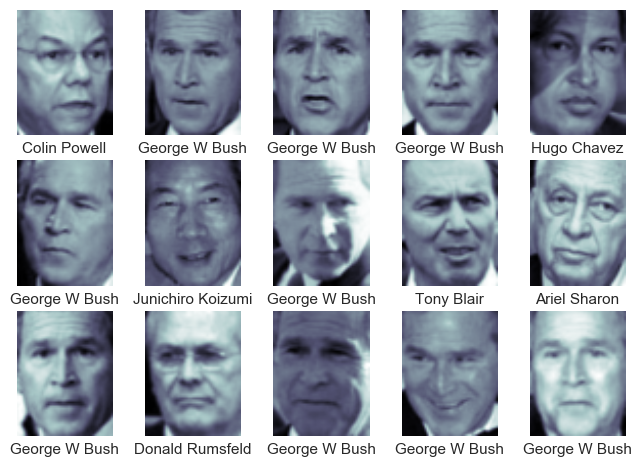

In [26]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [27]:
faces.data.shape

(1348, 2914)

In [28]:
# Parameters
learning_rate = 0.001
training_epochs = 400
batch_size = 100
display_step = 5

# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 2914 # Image size
n_classes = 8 # Number of people

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

Now let's create a model:

In [29]:
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [30]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()

Encode the labels as binary vectors:

In [31]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(faces.target)
bin_faces = lb.transform(faces.target)

Create training and test sets for validation:

In [32]:
from sklearn.model_selection import train_test_split
faces_train, faces_test, names_train, names_test = train_test_split(faces.data, bin_faces, train_size=1000,
                                                random_state=42)

total_batch = int(1000/batch_size)

In [33]:
# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        
        avg_cost = 0.
        
        # Loop over all batches
        for batch_x, batch_y in zip(np.split(faces_train, batch_size),
                                    np.split(names_train, batch_size)):

            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
            
        if epoch % display_step == 0:
            print("Epoch: {:3d}, cost={:.3f}".format(epoch, avg_cost))
    
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: faces_test, y: names_test}))

Epoch:   0, cost=2558954.468
Epoch:   5, cost=611642.815
Epoch:  10, cost=308148.126
Epoch:  15, cost=155632.735
Epoch:  20, cost=146435.038
Epoch:  25, cost=121707.573
Epoch:  30, cost=102754.577
Epoch:  35, cost=74879.476
Epoch:  40, cost=64409.988
Epoch:  45, cost=106781.462
Epoch:  50, cost=62988.312
Epoch:  55, cost=78996.107
Epoch:  60, cost=42742.732
Epoch:  65, cost=49580.396
Epoch:  70, cost=39842.085
Epoch:  75, cost=40957.400
Epoch:  80, cost=43443.073
Epoch:  85, cost=46440.550
Epoch:  90, cost=27877.176
Epoch:  95, cost=27325.868
Epoch: 100, cost=27531.135
Epoch: 105, cost=49009.698
Epoch: 110, cost=23450.767
Epoch: 115, cost=21328.548
Epoch: 120, cost=23303.526
Epoch: 125, cost=18309.888
Epoch: 130, cost=12926.821
Epoch: 135, cost=24580.333
Epoch: 140, cost=35401.731
Epoch: 145, cost=17938.276
Epoch: 150, cost=7171.053
Epoch: 155, cost=21320.401
Epoch: 160, cost=14876.799
Epoch: 165, cost=19575.209
Epoch: 170, cost=35041.043
Epoch: 175, cost=17926.546
Epoch: 180, cost=222

## TF.Learn

TF.Learn is a library that wraps a lot of new APIs by TensorFlow with nice and familiar Scikit Learn API.

TensorFlow Learn implements a convenient wrapper around TensorFlow API for creating many layers of fully connected units, so itâ€™s simple to start with deep model by just swapping classifier in our previous model to the TensorFlowDNNClassifier and specify hidden units per layer.

In [ ]:
import tflearn

from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression

In [ ]:
with tf.Graph().as_default():
    # Building convolutional network
    network = input_data(shape=[None, 2914, 2914, 1], name='input')
    network = conv_2d(network, 32, 3, activation='relu', regularizer="L2")
    network = max_pool_2d(network, 2)
    network = local_response_normalization(network)
    network = conv_2d(network, 64, 3, activation='relu', regularizer="L2")
    network = max_pool_2d(network, 2)
    network = local_response_normalization(network)
    network = fully_connected(network, 128, activation='tanh')
    network = dropout(network, 0.8)
    network = fully_connected(network, 256, activation='tanh')
    network = dropout(network, 0.8)
    network = fully_connected(network, 10, activation='softmax')
    network = regression(network, optimizer='adam', learning_rate=0.01,
                         loss='categorical_crossentropy', name='target')

    # Training
    model = tflearn.DNN(network, tensorboard_verbose=0)
    model.fit({'input': faces_train}, {'target': names_train}, n_epoch=20,
               validation_set=({'input': faces_test}, {'target': names_test}),
               snapshot_step=100, show_metric=True, run_id='convnet_mnist')

## References

Abadi M, Agarwal A, Barham P, Brevdo E, Chen Z. (2015) [TensorFlow: Large-Scale Machine Learning on Heterogeneous Systems](http://download.tensorflow.org/paper/whitepaper2015.pdf).

T. Hastie, R. Tibshirani and J. Friedman. (2009) [Elements of Statistical Learning: Data Mining, Inference, and Prediction](http://statweb.stanford.edu/~tibs/ElemStatLearn/), second edition. Springer.

S. Marsland. (2009) [Machine Learning: An Algorithmic Perspective](Machine Learning: An Algorithmic Perspectivehttp://seat.massey.ac.nz/personal/s.r.marsland/MLBook.html). CRC Press.